# Cotton Disease Detection

## Importing Libraries

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

Inception v3 is been choosen instead of resnet 50 and resnet 152v2 because it took computationally less time as well as was having good accuracy

In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'drive/MyDrive/data/train'
valid_path = 'drive/MyDrive/data/test'

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('drive/MyDrive/data/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

## Compiling model

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


## Model fitting and Training

In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 588s 9s/step - loss: 3.6757 - accuracy: 0.6167 - val_loss: 0.4216 - val_accuracy: 0.9043
Epoch 2/20
61/61 [==============================] - 35s 576ms/step - loss: 0.5935 - accuracy: 0.8858 - val_loss: 0.2503 - val_accuracy: 0.9136
Epoch 3/20
61/61 [==============================] - 35s 577ms/step - loss: 0.5130 - accuracy: 0.9083 - val_loss: 0.6398 - val_accuracy: 0.8920
Epoch 4/20
61/61 [==============================] - 35s 571ms/step - loss: 0.6232 - accuracy: 0.9142 - val_loss: 0.6331 - val_accuracy: 0.9105
Epoch 5/20
61/61 [==============================] - 35s 573ms/step - loss: 0.4136 - accuracy: 0.9179 - val_loss: 1.8431 - val_accuracy: 0.7963
Epoch 6/20
61/61 [==============================] - 35s 568ms/step - loss: 0.7827 - accuracy: 0.9029 - val_loss: 0.5430 - val_accuracy: 0.9105
Epoch 7/20
61/61 [==============================] - 35s 569ms/step - loss: 0.7587 - accuracy: 0.9105 - val_loss: 0.5327 - val_accuracy: 0.9290
E

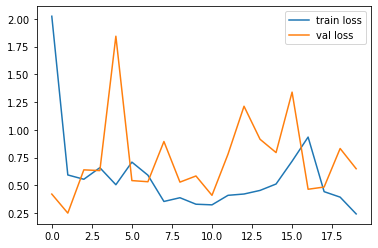

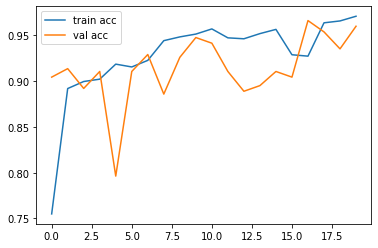

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred

array([[1.0000000e+00, 0.0000000e+00, 2.0310322e-18, 2.9594415e-27],
       [5.6706916e-27, 5.9480187e-30, 3.4060357e-20, 1.0000000e+00],
       [3.0336883e-23, 3.9783544e-35, 1.0000000e+00, 6.6448092e-32],
       ...,
       [3.0650364e-31, 1.0000000e+00, 2.5620086e-16, 2.9545965e-16],
       [8.7362358e-32, 1.4017063e-19, 5.9432093e-23, 1.0000000e+00],
       [1.1171987e-16, 9.9998128e-01, 1.8767814e-05, 2.6977379e-10]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([0, 3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 3, 1, 3,
       1, 0, 2, 2, 1, 0, 0, 2, 3, 2, 2, 3, 2, 2, 2, 1, 0, 3, 2, 1, 1, 2,
       0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 0, 3, 0, 1, 3, 3, 1, 2, 2, 2, 0, 3,
       3, 1, 2, 3, 1, 2, 2, 1, 2, 3, 3, 1, 0, 3, 1, 2, 0, 1, 3, 1, 3, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 3, 3, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 3, 1,
       2, 2, 1, 2, 1, 3, 3, 0, 3, 0, 2, 1, 1, 1, 1, 0, 3, 3, 2, 1, 1, 0,
       2, 3, 2, 3, 1, 0, 1, 3, 2, 2, 1, 2, 0, 3, 3, 2, 3, 1, 3, 1, 1, 2,
       0, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 3,
       3, 1, 3, 3, 1, 0, 3, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 1, 1, 2, 1, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 2, 1, 3, 2, 1, 0, 0, 0, 2, 1, 0, 3, 3, 1,
       2, 1, 3, 2, 0, 1, 3, 0, 2, 1, 0, 2, 3, 2, 2, 1, 0, 3, 1, 1, 3, 2,
       1, 3, 1, 3, 3, 3, 3, 3, 0, 3, 2, 3, 1, 1, 2, 2, 1, 3, 1, 3, 0, 1,
       1, 2, 0, 3, 3, 0, 1, 3, 3, 3, 1, 2, 0, 3, 3, 3, 2, 2, 0, 0, 2, 1,
       0, 3, 3, 1, 3, 0, 2, 3, 3, 1, 0, 3, 3, 3, 1,